In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [25]:
df1= pd.read_excel("quantinumdata - Copy.xlsx")

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  SIZE_CATEGORY     264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

In [27]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SIZE_CATEGORY
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,Small Size
1,2019-05-14,1,1307,348,66,CC's Nacho Cheese 175g,3,6.3,175,CC's,MIDAGE SINGLES/COUPLES,Budget,Small Size
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget,Small Size
3,2019-03-09,1,1307,347,54,CC's Original 175g,1,2.1,175,CC's,MIDAGE SINGLES/COUPLES,Budget,Small Size
4,2019-05-20,1,1343,383,61,Smith's Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith's,MIDAGE SINGLES/COUPLES,Budget,Small Size


In [191]:
df= df1.copy()

In [192]:
df['Month_year']   = df['DATE'].dt.month_name() + df['DATE'].dt.year.astype(str)
df['Month_year']     = pd.to_datetime(df['Month_year'].astype(str), format = '%B%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  SIZE_CATEGORY     264834 non-null  object        
 13  Month_year        264834 non-null  datetime64[ns]
dtypes: d

In [193]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SIZE_CATEGORY,Month_year
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,Small Size,2018-10-01
1,2019-05-14,1,1307,348,66,CC's Nacho Cheese 175g,3,6.3,175,CC's,MIDAGE SINGLES/COUPLES,Budget,Small Size,2019-05-01
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget,Small Size,2018-11-01
3,2019-03-09,1,1307,347,54,CC's Original 175g,1,2.1,175,CC's,MIDAGE SINGLES/COUPLES,Budget,Small Size,2019-03-01
4,2019-05-20,1,1343,383,61,Smith's Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith's,MIDAGE SINGLES/COUPLES,Budget,Small Size,2019-05-01


In [194]:
storeObs = pd.DataFrame(df.groupby(['STORE_NBR','Month_year']).agg({'TOT_SALES' : 'sum'}).reset_index())['STORE_NBR'].value_counts()
storeObs

1      12
184    12
170    12
171    12
172    12
       ..
11      2
252     2
76      1
92      1
85      1
Name: STORE_NBR, Length: 272, dtype: int64

In [195]:
storesWithFullObs = list(storeObs.index[storeObs == 12])

In [196]:
df = df[df['STORE_NBR'].isin(storesWithFullObs)]

In [197]:
df2 = df.copy()

In [198]:
df3 = df.copy()

In [199]:
start_of_trial      = '2019-02-01'
end_of_trial        = '2019-05-01'

In [200]:
df = df[(df["Month_year"] < start_of_trial)]
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SIZE_CATEGORY,Month_year
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,Small Size,2018-10-01
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget,Small Size,2018-11-01
5,2018-08-17,2,2373,974,69,Smith's Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smith's,MIDAGE SINGLES/COUPLES,Budget,Small Size,2018-08-01
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChIps Hny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,Small Size,2018-08-01
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,Tyrrells,MIDAGE SINGLES/COUPLES,Budget,Small Size,2018-08-01


In [353]:
def Trialstore_pretialperiod(storenumber,dataframe):
    Trialstore_pretialperiod = dataframe[dataframe["STORE_NBR"] == storenumber]
    Trialstore_pretialperiod = Trialstore_pretialperiod[["Month_year", "STORE_NBR", "LYLTY_CARD_NBR", "PROD_QTY", "TOT_SALES","TXN_ID"]]
    Trialstore_pretialperiod = Trialstore_pretialperiod.groupby(["Month_year"]).agg({"TOT_SALES":"sum", "PROD_QTY":"sum", "LYLTY_CARD_NBR":"nunique","TXN_ID":"nunique"})
    Trialstore_pretialperiod["Sales per Customer"] = Trialstore_pretialperiod["TOT_SALES"]/Trialstore_pretialperiod["LYLTY_CARD_NBR"]
    Trialstore_pretialperiod["Transaction per Customer"] = Trialstore_pretialperiod["TXN_ID"]/Trialstore_pretialperiod["LYLTY_CARD_NBR"]
    Trialstore_pretialperiod["Sales per Taransaction"] = Trialstore_pretialperiod["TOT_SALES"]/Trialstore_pretialperiod["TXN_ID"]
    Trialstore_pretialperiod["Qty per Transaction"] = Trialstore_pretialperiod["PROD_QTY"]/Trialstore_pretialperiod["TXN_ID"]
    Trialstore_pretialperiod["Sales per Qty"] = Trialstore_pretialperiod["TOT_SALES"]/Trialstore_pretialperiod["PROD_QTY"]
    Trialstore_pretialperiod["STORE_NBR"] = storenumber
    return Trialstore_pretialperiod

In [354]:
STORE88 = Trialstore_pretialperiod(88,df)
STORE88

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,1310.0,306,129,153,10.155039,1.186047,8.562092,2.000000,4.281046,88
2018-08-01,1323.8,303,131,158,10.105344,1.206107,8.378481,1.917722,4.368977,88
2018-09-01,1423.0,318,124,157,11.475806,1.266129,9.063694,2.025478,4.474843,88
2018-10-01,1352.4,316,123,155,10.995122,1.260163,8.725161,2.038710,4.279747,88
2018-11-01,1382.8,314,130,156,10.636923,1.200000,8.864103,2.012821,4.403822,88
2018-12-01,1325.2,298,126,148,10.517460,1.174603,8.954054,2.013514,4.446980,88
2019-01-01,1266.4,292,117,144,10.823932,1.230769,8.794444,2.027778,4.336986,88


In [203]:
STORE86 = Trialstore_pretialperiod(86,df)
STORE86.head()

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2018-07-01,892.20,251,99,126,9.012121,1.272727,7.080952,1.992063,3.554582
2018-08-01,764.05,215,94,110,8.128191,1.170213,6.945909,1.954545,3.553721
2018-09-01,914.60,258,103,128,8.879612,1.242718,7.145313,2.015625,3.544961
2018-10-01,948.40,276,109,138,8.700917,1.266055,6.872464,2.000000,3.436232
2018-11-01,918.00,254,100,125,9.180000,1.250000,7.344000,2.032000,3.614173


In [204]:
STORE77 = Trialstore_pretialperiod(77,df)
STORE77.head()

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2018-07-01,296.8,84,51,55,5.819608,1.078431,5.396364,1.527273,3.533333
2018-08-01,255.5,74,47,48,5.436170,1.021277,5.322917,1.541667,3.452703
2018-09-01,225.2,70,42,44,5.361905,1.047619,5.118182,1.590909,3.217143
2018-10-01,204.5,52,37,38,5.527027,1.027027,5.381579,1.368421,3.932692
2018-11-01,245.3,67,41,44,5.982927,1.073171,5.575000,1.522727,3.661194


In [205]:
def SelectControlstore(trialstore, allthestores):
    dict_={"STORE_NBR":[],"cor_tot":[],"cor_ncus":[],"corr_SPC":[],"disTotal":[],"disCus":[]}
    dfrr = pd.DataFrame(dict_)

    for z in df["STORE_NBR"].unique():
        CONTROLSTORE = allthestores[allthestores["STORE_NBR"] == z]
        CONTROLSTORE = CONTROLSTORE[["Month_year", "STORE_NBR", "LYLTY_CARD_NBR", "PROD_QTY", "TOT_SALES","TXN_ID"]]
        CONTROLSTORE = CONTROLSTORE.groupby(["Month_year"]).agg({"TOT_SALES":"sum", "PROD_QTY":"sum", "LYLTY_CARD_NBR":"nunique","TXN_ID":"nunique"})
        CONTROLSTORE["Sales per Customer"] = CONTROLSTORE["TOT_SALES"]/CONTROLSTORE["LYLTY_CARD_NBR"]
        CONTROLSTORE["Transaction per Customer"] = CONTROLSTORE["TXN_ID"]/CONTROLSTORE["LYLTY_CARD_NBR"]
        CONTROLSTORE["Sales per Transaction"] = CONTROLSTORE["TOT_SALES"]/CONTROLSTORE["TXN_ID"]
        corr_tot = trialstore["TOT_SALES"].corr(CONTROLSTORE["TOT_SALES"])
        #corr_qty_per_tran= (trialstore["PROD_QTY"]/trialstore["TXN_ID"]).corr(CONTROLSTORE["PROD_QTY"]/CONTROLSTORE["TXN_ID"])
        corr_ncustomer = trialstore["LYLTY_CARD_NBR"].corr(CONTROLSTORE["LYLTY_CARD_NBR"])
        corr_sales_per_customer = trialstore["Sales per Customer"].corr(CONTROLSTORE["Sales per Customer"])
        #corr_sales_per_transaction = trialstore["Sales per Taransaction"].corr(CONTROLSTORE["Sales per Transaction"])
        #corr_Transaction_per_Customer = trialstore["Transaction per Customer"].corr(CONTROLSTORE["Transaction per Customer"])
        distanceTota = abs((trialstore["TOT_SALES"]-CONTROLSTORE["TOT_SALES"]).mean())
        distanceCus = abs((trialstore["LYLTY_CARD_NBR"]-CONTROLSTORE["LYLTY_CARD_NBR"]).mean())
        dfrr.loc[len(dfrr.index)] = [z,corr_tot,corr_ncustomer,corr_sales_per_customer,distanceTota,distanceCus]

 

        
    dfrr["disTotal"] = 1- (dfrr["disTotal"]-dfrr["disTotal"].min())/(dfrr["disTotal"].max()-dfrr["disTotal"].min())
    dfrr["disCus"] = 1- (dfrr["disCus"]-dfrr["disCus"].min())/(dfrr["disCus"].max()-dfrr["disCus"].min())
    dfrr["corr"]=((dfrr.drop(["STORE_NBR","disTotal","disCus"],axis=1).sum(axis=1)/3)*0.2) + ((dfrr[["disTotal","disCus"]].sum(axis=1)/2)*0.8)
    dfrr =dfrr.sort_values("corr", ascending = False)
    dfrr.index = range(len(dfrr["cor_tot"]))
    return dfrr

In [206]:
SelectControlstore(STORE88,df)

,STORE_NBR,cor_tot,cor_ncus,corr_SPC,disTotal,disCus,corr
0,88.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,237.0,0.308479,0.947326,-0.031157,0.998426,0.994145,0.878672
2,201.0,0.492735,0.511302,0.818272,0.871894,0.919204,0.837926
3,203.0,0.508001,0.285063,0.067817,0.952572,0.955504,0.820622
4,58.0,0.122810,-0.226974,0.356887,0.977914,0.992974,0.805203
...,...,...,...,...,...,...,...
255,158.0,-0.099185,-0.128578,-0.202561,0.011051,0.021077,-0.015837
256,224.0,-0.201477,0.067909,-0.237619,0.008873,0.009368,-0.017449
257,99.0,0.444093,-0.195893,-0.684174,0.000000,0.003513,-0.027660
258,258.0,0.087493,-0.825850,0.005019,0.008248,0.001171,-0.045122


In [207]:
SelectControlstore(STORE86,df)

,STORE_NBR,cor_tot,cor_ncus,corr_SPC,disTotal,disCus,corr
0,86.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,155.0,0.877882,0.942876,0.491720,0.968584,1.000000,0.941599
2,138.0,0.759864,0.749701,0.597930,0.966206,0.968703,0.914463
3,172.0,0.524475,0.571024,0.519716,0.998927,0.965723,0.893541
4,62.0,0.528883,0.176687,0.858248,0.963045,0.982116,0.882319
...,...,...,...,...,...,...,...
255,267.0,-0.112351,-0.348669,-0.259226,0.008384,0.019374,-0.036913
256,192.0,-0.301867,-0.515008,-0.359041,0.023872,0.038748,-0.053347
257,52.0,-0.601629,-0.594459,-0.249560,0.024254,0.020864,-0.078329
258,146.0,-0.775127,-0.654598,-0.026526,0.008268,0.005961,-0.091392


In [208]:
SelectControlstore(STORE77,df)

,STORE_NBR,cor_tot,cor_ncus,corr_SPC,disTotal,disCus,corr
0,77.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,233.0,0.903774,0.990358,-0.221432,0.995410,0.998469,0.909065
2,265.0,0.639759,0.573460,0.663367,0.969216,0.989280,0.908504
3,46.0,0.435650,0.550739,0.466378,0.993091,0.995406,0.892250
4,234.0,0.696325,0.582356,0.780970,0.882227,0.992343,0.887138
...,...,...,...,...,...,...,...
255,165.0,0.343931,-0.126591,-0.081256,0.117252,0.137825,0.111103
256,4.0,-0.263300,-0.295639,0.477671,0.130226,0.157734,0.109766
257,58.0,0.115051,0.236247,-0.198366,0.124166,0.119449,0.107641
258,88.0,-0.114199,0.765048,-0.358820,0.100180,0.110260,0.103645


In [209]:
def upscalefactor(trialstore_number,controlstore_number):
    Sales = df[df["STORE_NBR"]==trialstore_number]["TOT_SALES"].sum()/df[df["STORE_NBR"]==controlstore_number]["TOT_SALES"].sum()
    Customer = len(pd.unique(df[df["STORE_NBR"]==trialstore_number]["LYLTY_CARD_NBR"]))/len(pd.unique(df[df["STORE_NBR"]==controlstore_number]["LYLTY_CARD_NBR"]))
    return (Sales,Customer)

In [210]:
ST_88 = upscalefactor(88,237)
ST_88

(1.001558330664959, 1.03601108033241)

In [211]:
ST_77 = upscalefactor(77,233)
ST_77

(1.023617303289553, 0.9958333333333333)

In [212]:
ST_86 = upscalefactor(86,155)
ST_86

(0.9700651481287743, 1.040983606557377)

In [213]:
store_77_pretrialperiod = Trialstore_pretialperiod(77,df)

store_77_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2018-07-01,296.8,84,51,55,5.819608,1.078431,5.396364,1.527273,3.533333
2018-08-01,255.5,74,47,48,5.436170,1.021277,5.322917,1.541667,3.452703
2018-09-01,225.2,70,42,44,5.361905,1.047619,5.118182,1.590909,3.217143
2018-10-01,204.5,52,37,38,5.527027,1.027027,5.381579,1.368421,3.932692
2018-11-01,245.3,67,41,44,5.982927,1.073171,5.575000,1.522727,3.661194
2018-12-01,267.3,72,46,48,5.810870,1.043478,5.568750,1.500000,3.712500
2019-01-01,204.4,65,35,39,5.840000,1.114286,5.241026,1.666667,3.144615


In [214]:
store_233_pretrialperiod = Trialstore_pretialperiod(233,df)
store_233_pretrialperiod["TOT_SALES"] *= ST_77[0]
store_233_pretrialperiod["LYLTY_CARD_NBR"] *=ST_77[1]

store_233_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2018-07-01,297.565550,88,50.787500,54,5.700000,1.058824,5.383333,1.629630,3.303409
2018-08-01,292.652187,80,47.800000,50,5.956250,1.041667,5.718000,1.600000,3.573750
2018-09-01,233.998916,70,41.825000,45,5.442857,1.071429,5.080000,1.555556,3.265714
2018-10-01,190.085733,56,34.854167,36,5.305714,1.028571,5.158333,1.555556,3.316071
2018-11-01,216.597421,62,39.833333,41,5.290000,1.025000,5.160976,1.512195,3.412903
2018-12-01,286.408121,75,46.804167,50,5.953191,1.063830,5.596000,1.500000,3.730667
2019-01-01,181.692071,47,34.854167,35,5.071429,1.000000,5.071429,1.342857,3.776596


In [215]:
A = store_77_pretrialperiod[["TOT_SALES"]]
A = A.merge(store_233_pretrialperiod[["TOT_SALES"]], on = "Month_year")
A.columns = ["TRIAL STORE", "CONTROL STORE"]

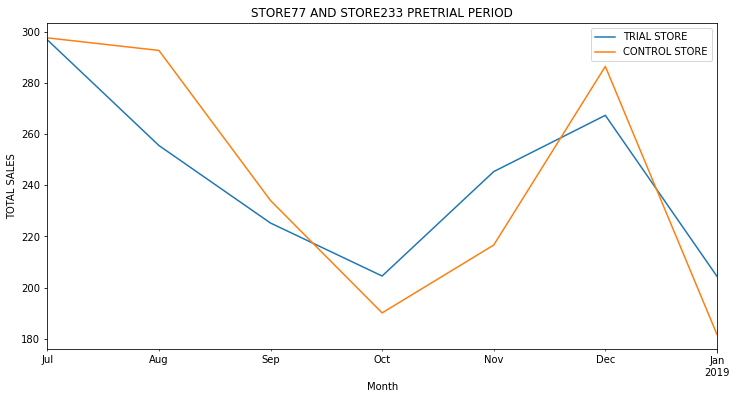

In [216]:
A.plot(kind="line", figsize = (12,6))
plt.xlabel("Month")
plt.ylabel("TOTAL SALES")
plt.title("STORE77 AND STORE233 PRETRIAL PERIOD")
plt.show()

In [217]:
df3 = df3[(df3["Month_year"] >= start_of_trial) & (df3["Month_year"] < end_of_trial)]

In [218]:
store_77_trialperiod = Trialstore_pretialperiod(77,df3)

store_77_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2019-02-01,235.0,74,45,45,5.222222,1.000000,5.222222,1.644444,3.175676
2019-03-01,278.5,82,50,55,5.570000,1.100000,5.063636,1.490909,3.396341
2019-04-01,263.5,78,47,48,5.606383,1.021277,5.489583,1.625000,3.378205


In [219]:
store_233_trialperiod = Trialstore_pretialperiod(233,df3)
store_233_trialperiod["TOT_SALES"] *= ST_77[0]
store_233_trialperiod["LYLTY_CARD_NBR"] *=ST_77[1]

store_233_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2019-02-01,249.762622,70,44.812500,47,5.422222,1.044444,5.191489,1.489362,3.485714
2019-03-01,203.802205,59,39.833333,41,4.977500,1.025000,4.856098,1.439024,3.374576
2019-04-01,162.345704,46,29.875000,32,5.286667,1.066667,4.956250,1.437500,3.447826


In [271]:
def plot_9(df,trialstorenbr, controlstorenub, upscale):
    store_77_pretrialperiod = Trialstore_pretialperiod(trialstorenbr,df)
    store_233_pretrialperiod = Trialstore_pretialperiod(controlstorenub,df)
    store_233_pretrialperiod["TOT_SALES"] *= upscale[0]
    store_233_pretrialperiod["LYLTY_CARD_NBR"] *=upscale[1]

    A = store_77_pretrialperiod[["TOT_SALES"]]
    A = A.merge(store_233_pretrialperiod[["TOT_SALES"]], on = "Month_year")
    A.columns = ["TRIAL STORE", "CONTROL STORE"]
    A.plot(kind="line", figsize = (12,6))
    plt.xlabel("Month")
    plt.ylabel("TOTAL SALES")
    plt.title("STORE77 AND STORE233 PRETRIAL PERIOD")
    plt.show()
    return A

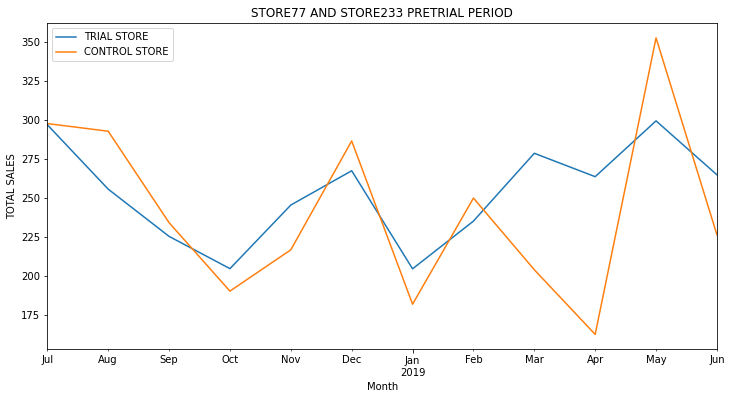

In [276]:
B = plot_9(df2,77,233,ST_77)

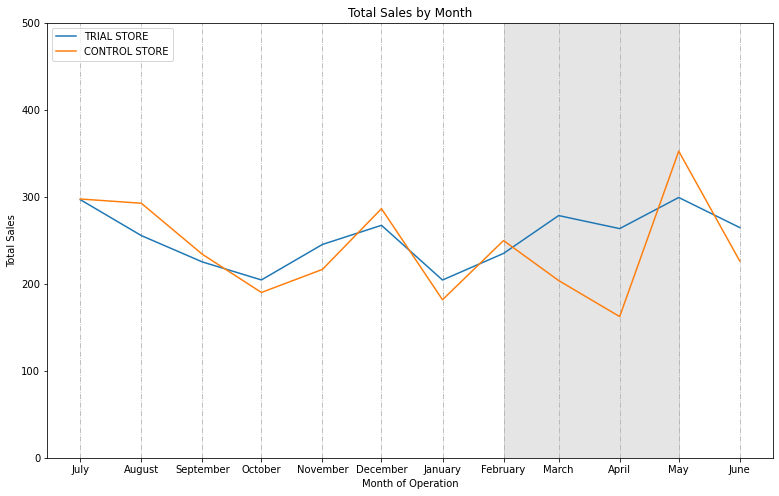

In [278]:
#Set Size
plt.figure(figsize =(13,8))

#Plot
plt.plot(B)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.xticks(B.index, labels = B.index.month_name())
plt.ylabel('Total Sales')
plt.ylim((0, 500))
plt.legend(B.columns)

# Highlight trial period
plt.axvspan(start_of_trial, '2019-05-01', color = 'grey', alpha = 0.2)
plt.grid(axis = 'x', linestyle = 'dashdot')

plt.show()

In [224]:
def percentiff(bs,cs):
    diff = pd.DataFrame(((bs["TOT_SALES"]-cs["TOT_SALES"])/bs["TOT_SALES"]))
    diff["Customer"] = (((bs["LYLTY_CARD_NBR"]-cs["LYLTY_CARD_NBR"])/bs["LYLTY_CARD_NBR"]))
    return diff


In [225]:
diff_77 = percentiff(store_77_trialperiod,store_233_trialperiod)
diff_77

,TOT_SALES,Customer
Month_year,,
2019-02-01,-0.062820,0.004167
2019-03-01,0.268215,0.203333
2019-04-01,0.383887,0.364362


In [226]:
diff_77_pretrial = percentiff(store_77_pretrialperiod,store_233_pretrialperiod)
diff_77_pretrial = diff_77_pretrial.dropna()

In [227]:
def test_statistic(difff,str_,null_value):
    se = (difff[str_].std()/np.sqrt(len(difff)))
    return pd.DataFrame((difff[str_]-null_value)/se)

In [228]:
def pretrial_t_value(difff,str_,null_value):
    se = (difff[str_].std()/np.sqrt(len(difff)))
    t_value = (difff[str_].mean()-null_value)/se
    return t_value

In [231]:
diff_77_pretrial

,TOT_SALES,Customer
Month_year,,
2018-07-01,-0.002579,0.004167
2018-08-01,-0.145410,-0.017021
2018-09-01,-0.039072,0.004167
2018-10-01,0.070485,0.057995
2018-11-01,0.117010,0.028455
2018-12-01,-0.071486,-0.017482
2019-01-01,0.111096,0.004167


In [229]:
# OBTAINING VALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD

pretrial_t_value(diff_77_pretrial,"TOT_SALES", 0)   

0.15320434215178672

In [236]:


# OBTAINING THE PVALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD
import scipy.stats
scipy.stats.t.sf(abs(0.15320434215178672), df=7)*2

"""
 WE DO NOT REJECT THE NULL HYPOTHESIS, THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES
 DURING THE PRETRIAL PERIOD

"""

0.8825600299162414

In [230]:
test_statistic(diff_77, "TOT_SALES", 0)

"""
OBTAINING THE T VALUES FOR THE DIFFERENCE IN TOTAL SALES DURING THE TRIAL PERIOD

IT WAS OBSERVED THAT T VALUES FOR MARCH AND APRIL ARE HIGH AND HENCE WE REJECT THE NULL HYPPOTHESIS FOR APRIL AND MAY
"""

,TOT_SALES
Month_year,
2019-02-01,-0.469310
2019-03-01,2.003764
2019-04-01,2.867924


In [310]:
store_88_pretrialperiod = Trialstore_pretialperiod(88,df)

store_88_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2018-07-01,1310.0,306,129,153,10.155039,1.186047,8.562092,2.000000,4.281046
2018-08-01,1323.8,303,131,158,10.105344,1.206107,8.378481,1.917722,4.368977
2018-09-01,1423.0,318,124,157,11.475806,1.266129,9.063694,2.025478,4.474843
2018-10-01,1352.4,316,123,155,10.995122,1.260163,8.725161,2.038710,4.279747
2018-11-01,1382.8,314,130,156,10.636923,1.200000,8.864103,2.012821,4.403822
2018-12-01,1325.2,298,126,148,10.517460,1.174603,8.954054,2.013514,4.446980
2019-01-01,1266.4,292,117,144,10.823932,1.230769,8.794444,2.027778,4.336986


In [320]:
store_88_trialperiod = Trialstore_pretialperiod(88,df3)

store_88_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty
Month_year,,,,,,,,,
2019-02-01,1370.2,308,124,153,11.050000,1.233871,8.955556,2.013072,4.448701
2019-03-01,1477.2,340,134,169,11.023881,1.261194,8.740828,2.011834,4.344706
2019-04-01,1439.4,324,128,162,11.245313,1.265625,8.885185,2.000000,4.442593


In [360]:


store_237_pretrialperiod = Trialstore_pretialperiod(237,df)
store_237_pretrialperiod["TOT_SALES"] *= ST_88[0]
store_237_pretrialperiod["LYLTY_CARD_NBR"] *=ST_88[1]

store_237_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,1450.657086,324,132.609418,162,11.315625,1.265625,8.940741,2.000000,4.470370,237
2018-08-01,1369.931485,313,139.861496,165,10.131852,1.222222,8.289697,1.896970,4.369968,237
2018-09-01,1324.260425,299,130.537396,149,10.493651,1.182540,8.873826,2.006711,4.422074,237
2018-10-01,1350.401097,299,127.429363,147,10.961789,1.195122,9.172109,2.034014,4.509365,237
2018-11-01,1399.777923,320,136.753463,161,10.587879,1.219697,8.680745,1.987578,4.367500,237
2018-12-01,1266.971288,289,128.465374,144,10.201613,1.161290,8.784722,2.006944,4.377163,237
2019-01-01,1221.600696,277,121.213296,139,10.424786,1.188034,8.774820,1.992806,4.403249,237


In [361]:
store_237_trialperiod = Trialstore_pretialperiod(237,df3)
store_237_trialperiod["TOT_SALES"] *= ST_88[0]
store_237_trialperiod["LYLTY_CARD_NBR"] *=ST_88[1]

store_237_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2019-02-01,1406.989143,314,130.537396,157,11.149206,1.246032,8.947771,2.000000,4.473885,237
2019-03-01,1210.082775,274,123.285319,134,10.152941,1.126050,9.016418,2.044776,4.409489,237
2019-04-01,1206.477165,272,124.321330,135,10.038333,1.125000,8.922963,2.014815,4.428676,237


In [362]:
def plot_9(df,trialstorenbr, controlstorenub, upscale):
    store_77_pretrialperiod = Trialstore_pretialperiod(trialstorenbr,df)
    store_233_pretrialperiod = Trialstore_pretialperiod(controlstorenub,df)
    store_233_pretrialperiod["TOT_SALES"] *= upscale[0]
    store_233_pretrialperiod["LYLTY_CARD_NBR"] *=upscale[1]

    A = store_77_pretrialperiod[["TOT_SALES"]]
    A = A.merge(store_233_pretrialperiod[["TOT_SALES"]], on = "Month_year")
    A.columns = ["TRIAL STORE", "CONTROL STORE"]
    A.plot(kind="line", figsize = (12,6))
    plt.xlabel("Month")
    plt.ylabel("TOTAL SALES")
    plt.title("STORE77 AND STORE233 PRETRIAL PERIOD")
    plt.show()
    return A

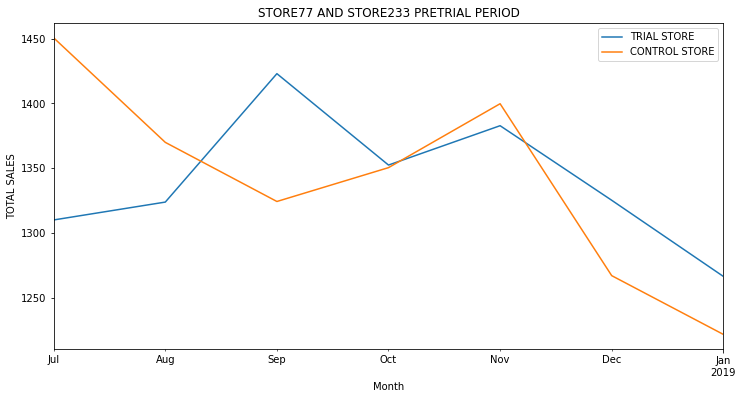

,TRIAL STORE,CONTROL STORE
Month_year,,
2018-07-01,1310.0,1450.657086
2018-08-01,1323.8,1369.931485
2018-09-01,1423.0,1324.260425
2018-10-01,1352.4,1350.401097
2018-11-01,1382.8,1399.777923
2018-12-01,1325.2,1266.971288
2019-01-01,1266.4,1221.600696


In [363]:
plot_9(df,88,237,ST_88)

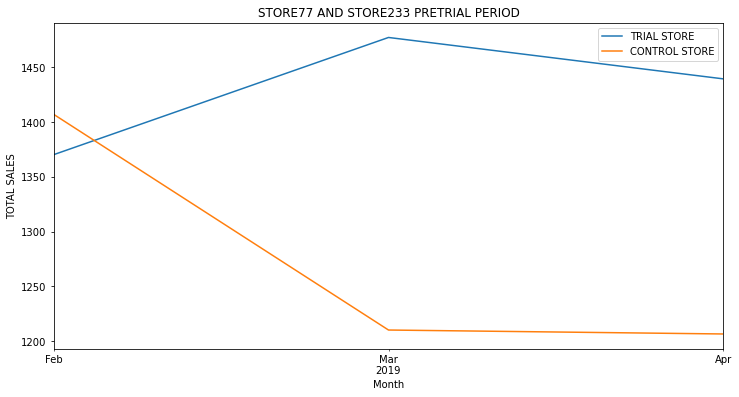

,TRIAL STORE,CONTROL STORE
Month_year,,
2019-02-01,1370.2,1406.989143
2019-03-01,1477.2,1210.082775
2019-04-01,1439.4,1206.477165


In [364]:
plot_9(df3,88,237,ST_88)

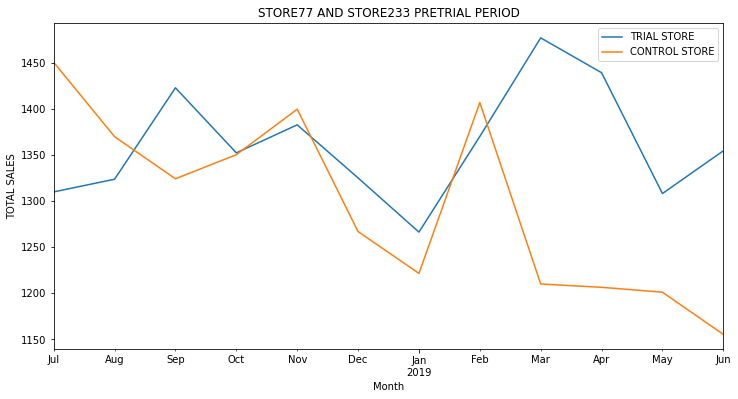

In [365]:
C = plot_9(df2,88,237,ST_88)

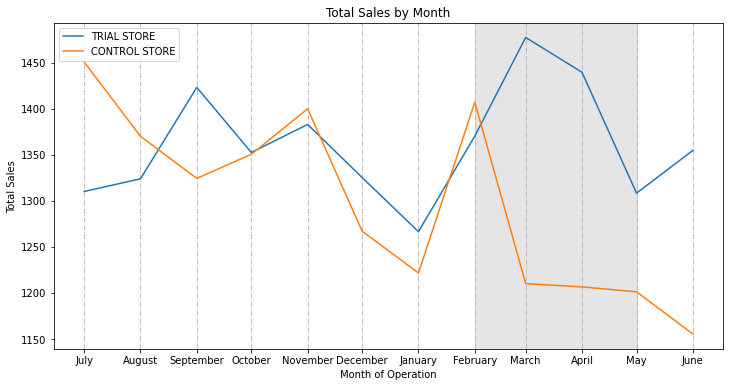

In [366]:
#Set Size
plt.figure(figsize =(12,6))

#Plot
plt.plot(C)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.xticks(C.index, labels = C.index.month_name())
plt.ylabel('Total Sales')
#plt.ylim((0, 1500))
plt.legend(C.columns)
# Highlight trial period
plt.axvspan(start_of_trial, '2019-05-01', color = 'grey', alpha = 0.2)
plt.grid(axis = 'x', linestyle = 'dashdot')


plt.show()
plt.show()

In [367]:
diff_88_pretrial = percentiff(store_88_pretrialperiod,store_237_pretrialperiod)
diff_88_pretrial

,TOT_SALES,Customer
Month_year,,
2018-07-01,-0.107372,-0.027980
2018-08-01,-0.034848,-0.067645
2018-09-01,0.069388,-0.052721
2018-10-01,0.001478,-0.036011
2018-11-01,-0.012278,-0.051950
2018-12-01,0.043940,-0.019566
2019-01-01,0.035375,-0.036011


In [368]:
# OBTAINING VALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD

t_value = pretrial_t_value(diff_88_pretrial,"TOT_SALES", 0)   

# OBTAINING THE PVALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD
import scipy.stats
print("pvalue is:", scipy.stats.t.sf(abs(t_value), df=7)*2)

"""
 WE DO NOT REJECT THE NULL HYPOTHESIS, THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES
 DURING THE PRETRIAL PERIOD

"""

pvalue is: 0.9787145193088711


'\n WE DO NOT REJECT THE NULL HYPOTHESIS, THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES\n DURING THE PRETRIAL PERIOD\n\n'

In [369]:
diff_88_trial =  percentiff(store_88_trialperiod,store_237_trialperiod)
diff_88_trial

,TOT_SALES,Customer
Month_year,,
2019-02-01,-0.026849,-0.052721
2019-03-01,0.180827,0.079960
2019-04-01,0.161819,0.028740


In [370]:
test_statistic(diff_88_trial, "TOT_SALES", 0)

"""
OBTAINING THE T VALUES FOR THE DIFFERENCE IN TOTAL SALES DURING THE TRIAL PERIOD

IT WAS OBSERVED THAT T VALUES FOR MARCH AND APRIL ARE HIGH AND HENCE WE REJECT THE NULL HYPPOTHESIS FOR APRIL AND MAY
"""

'\nOBTAINING THE T VALUES FOR THE DIFFERENCE IN TOTAL SALES DURING THE TRIAL PERIOD\n\nIT WAS OBSERVED THAT T VALUES FOR MARCH AND APRIL ARE HIGH AND HENCE WE REJECT THE NULL HYPPOTHESIS FOR APRIL AND MAY\n'

In [371]:
store_86_pretrialperiod = Trialstore_pretialperiod(86,df)

store_86_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,892.20,251,99,126,9.012121,1.272727,7.080952,1.992063,3.554582,86
2018-08-01,764.05,215,94,110,8.128191,1.170213,6.945909,1.954545,3.553721,86
2018-09-01,914.60,258,103,128,8.879612,1.242718,7.145313,2.015625,3.544961,86
2018-10-01,948.40,276,109,138,8.700917,1.266055,6.872464,2.000000,3.436232,86
2018-11-01,918.00,254,100,125,9.180000,1.250000,7.344000,2.032000,3.614173,86
2018-12-01,841.20,240,98,120,8.583673,1.224490,7.010000,2.000000,3.505000,86
2019-01-01,841.40,260,94,129,8.951064,1.372340,6.522481,2.015504,3.236154,86


In [372]:
store_86_trialperiod = Trialstore_pretialperiod(86,df3)

store_86_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2019-02-01,913.2,277,107,138,8.534579,1.289720,6.617391,2.007246,3.296751,86
2019-03-01,1026.8,284,115,140,8.928696,1.217391,7.334286,2.028571,3.615493,86
2019-04-01,848.2,254,105,126,8.078095,1.200000,6.731746,2.015873,3.339370,86


In [373]:
store_155_pretrialperiod = Trialstore_pretialperiod(155,df)
store_155_pretrialperiod["TOT_SALES"] *= ST_86[0]
store_155_pretrialperiod["LYLTY_CARD_NBR"] *=ST_86[1]

store_155_pretrialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,896.922236,250,105.139344,123,9.154455,1.217822,7.517073,2.032520,3.698400,155
2018-08-01,759.269991,229,94.729508,119,8.601099,1.307692,6.577311,1.924370,3.417904,155
2018-09-01,984.034086,290,107.221311,144,9.848544,1.398058,7.044444,2.013889,3.497931,155
2018-10-01,934.948790,272,112.426230,136,8.924074,1.259259,7.086765,2.000000,3.543382,155
2018-11-01,871.894555,270,105.139344,133,8.899010,1.316832,6.757895,2.030075,3.328889,155
2018-12-01,824.361363,242,100.975410,120,8.760825,1.237113,7.081667,2.016667,3.511570,155
2019-01-01,848.418979,252,99.934426,125,9.110417,1.302083,6.996800,2.016000,3.470635,155


In [374]:
store_155_trialperiod = Trialstore_pretialperiod(155,df3)
store_155_trialperiod["TOT_SALES"] *= ST_86[0]
store_155_trialperiod["LYLTY_CARD_NBR"] *=ST_86[1]

store_155_trialperiod

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2019-02-01,864.522060,254,98.893443,125,9.381053,1.315789,7.129600,2.032000,3.508661,155
2019-03-01,780.320405,240,97.852459,118,8.557447,1.255319,6.816949,2.033898,3.351667,155
2019-04-01,819.317024,242,103.057377,120,8.531313,1.212121,7.038333,2.016667,3.490083,155


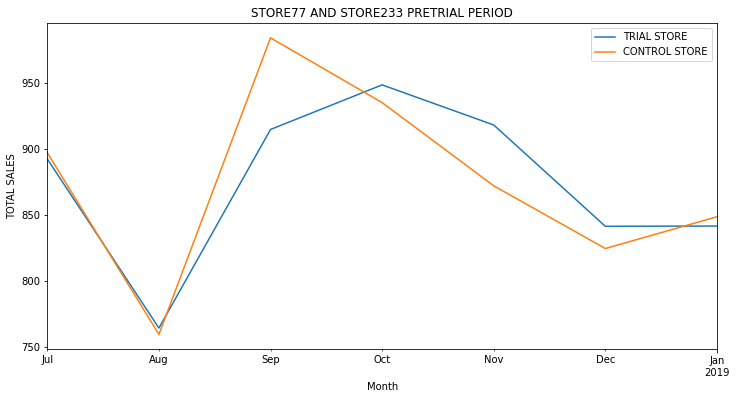

,TRIAL STORE,CONTROL STORE
Month_year,,
2018-07-01,892.20,896.922236
2018-08-01,764.05,759.269991
2018-09-01,914.60,984.034086
2018-10-01,948.40,934.948790
2018-11-01,918.00,871.894555
2018-12-01,841.20,824.361363
2019-01-01,841.40,848.418979


In [375]:
plot_9(df,86,155,ST_86)

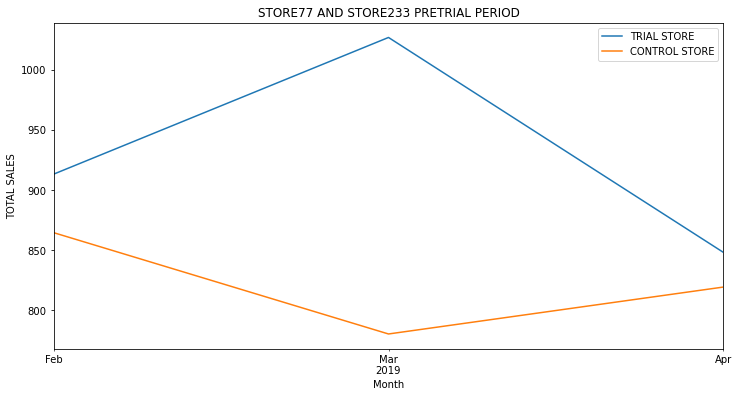

,TRIAL STORE,CONTROL STORE
Month_year,,
2019-02-01,913.2,864.522060
2019-03-01,1026.8,780.320405
2019-04-01,848.2,819.317024


In [376]:
plot_9(df3,86,155,ST_86)

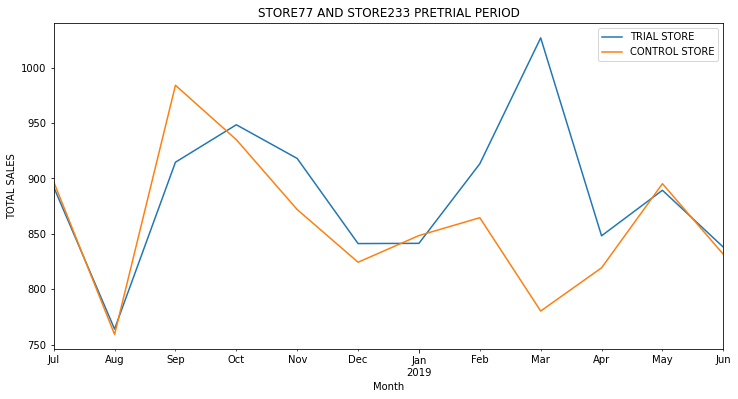

In [377]:
D = plot_9(df2,86,155,ST_86)

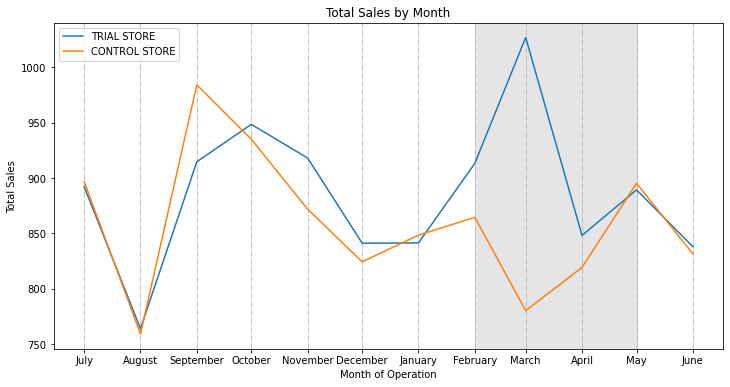

In [378]:
#Set Size
plt.figure(figsize =(12,6))

#Plot
plt.plot(D)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.xticks(D.index, labels = D.index.month_name())
plt.ylabel('Total Sales')
#plt.ylim((0, 1500))
plt.legend(D.columns)
# Highlight trial period
plt.axvspan(start_of_trial, '2019-05-01', color = 'grey', alpha = 0.2)
plt.grid(axis = 'x', linestyle = 'dashdot')


plt.show()
plt.show()

In [379]:
diff_86_pretrial = percentiff(store_86_pretrialperiod,store_155_pretrialperiod)
diff_86_pretrial

,TOT_SALES,Customer
Month_year,,
2018-07-01,-0.005293,-0.062014
2018-08-01,0.006256,-0.007761
2018-09-01,-0.075917,-0.040984
2018-10-01,0.014183,-0.031433
2018-11-01,0.050224,-0.051393
2018-12-01,0.020017,-0.030361
2019-01-01,-0.008342,-0.063132


In [380]:
# OBTAINING VALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD

t_value = pretrial_t_value(diff_86_pretrial,"TOT_SALES", 0)   

# OBTAINING THE PVALUE FOR THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES DURING THE PRETRIAL PERIOD
import scipy.stats
print("pvalue is:", scipy.stats.t.sf(abs(t_value), df=7)*2)

"""
 WE DO NOT REJECT THE NULL HYPOTHESIS, THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES
 DURING THE PRETRIAL PERIOD

"""

pvalue is: 0.9915344747065612


'\n WE DO NOT REJECT THE NULL HYPOTHESIS, THE DIFFERENCE IN SALES BETWEEN THE TRIAL AND CONTROL STORES\n DURING THE PRETRIAL PERIOD\n\n'

In [381]:
diff_86_trial =  percentiff(store_86_trialperiod,store_155_trialperiod)
diff_86_trial

,TOT_SALES,Customer
Month_year,,
2019-02-01,0.053305,0.075762
2019-03-01,0.240046,0.149109
2019-04-01,0.034052,0.018501


In [382]:
test_statistic(diff_86_trial, "TOT_SALES", 0)

"""
OBTAINING THE T VALUES FOR THE DIFFERENCE IN TOTAL SALES DURING THE TRIAL PERIOD

IT WAS OBSERVED THAT T VALUES FOR MARCH AND APRIL ARE HIGH AND HENCE WE REJECT THE NULL HYPPOTHESIS FOR APRIL AND MAY
"""

'\nOBTAINING THE T VALUES FOR THE DIFFERENCE IN TOTAL SALES DURING THE TRIAL PERIOD\n\nIT WAS OBSERVED THAT T VALUES FOR MARCH AND APRIL ARE HIGH AND HENCE WE REJECT THE NULL HYPPOTHESIS FOR APRIL AND MAY\n'

In [383]:
#sum_df.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\QUANTINUM\controlstores.csv", index = False)

NameError: name 'sum_df' is not defined

In [384]:
store_88 = Trialstore_pretialperiod(88,df2)

store_88


,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,1310.00,306,129,153,10.155039,1.186047,8.562092,2.000000,4.281046,88
2018-08-01,1323.80,303,131,158,10.105344,1.206107,8.378481,1.917722,4.368977,88
2018-09-01,1423.00,318,124,157,11.475806,1.266129,9.063694,2.025478,4.474843,88
2018-10-01,1352.40,316,123,155,10.995122,1.260163,8.725161,2.038710,4.279747,88
2018-11-01,1382.80,314,130,156,10.636923,1.200000,8.864103,2.012821,4.403822,88
2018-12-01,1325.20,298,126,148,10.517460,1.174603,8.954054,2.013514,4.446980,88
2019-01-01,1266.40,292,117,144,10.823932,1.230769,8.794444,2.027778,4.336986,88
2019-02-01,1370.20,308,124,153,11.050000,1.233871,8.955556,2.013072,4.448701,88
2019-03-01,1477.20,340,134,169,11.023881,1.261194,8.740828,2.011834,4.344706,88


In [385]:
store_237 = Trialstore_pretialperiod(237,df2)
store_237["TOT_SALES"] *= ST_88[0]
store_237["LYLTY_CARD_NBR"] *=ST_88[1]

store_237

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,1450.657086,324,132.609418,162,11.315625,1.265625,8.940741,2.000000,4.470370,237
2018-08-01,1369.931485,313,139.861496,165,10.131852,1.222222,8.289697,1.896970,4.369968,237
2018-09-01,1324.260425,299,130.537396,149,10.493651,1.182540,8.873826,2.006711,4.422074,237
2018-10-01,1350.401097,299,127.429363,147,10.961789,1.195122,9.172109,2.034014,4.509365,237
2018-11-01,1399.777923,320,136.753463,161,10.587879,1.219697,8.680745,1.987578,4.367500,237
2018-12-01,1266.971288,289,128.465374,144,10.201613,1.161290,8.784722,2.006944,4.377163,237
2019-01-01,1221.600696,277,121.213296,139,10.424786,1.188034,8.774820,1.992806,4.403249,237
2019-02-01,1406.989143,314,130.537396,157,11.149206,1.246032,8.947771,2.000000,4.473885,237
2019-03-01,1210.082775,274,123.285319,134,10.152941,1.126050,9.016418,2.044776,4.409489,237


In [345]:
?df.append()

Object `df.append()` not found.


In [386]:
TRIAL_STORE1 = store_88.append(store_237)

In [387]:
store_86 = Trialstore_pretialperiod(86,df2)



store_155 = Trialstore_pretialperiod(155,df2)
store_155["TOT_SALES"] *= ST_86[0]
store_155["LYLTY_CARD_NBR"] *=ST_86[1]

TRIAL_STORE2 = store_86.append(store_155)

In [388]:
store_77 = Trialstore_pretialperiod(77,df2)



store_233 = Trialstore_pretialperiod(233,df2)
store_233["TOT_SALES"] *= ST_77[0]
store_233["LYLTY_CARD_NBR"] *=ST_77[1]

TRIAL_STORE3 = store_77.append(store_233)

In [389]:
TRIAL_STORE1.head()

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,1310.0,306,129.0,153,10.155039,1.186047,8.562092,2.000000,4.281046,88
2018-08-01,1323.8,303,131.0,158,10.105344,1.206107,8.378481,1.917722,4.368977,88
2018-09-01,1423.0,318,124.0,157,11.475806,1.266129,9.063694,2.025478,4.474843,88
2018-10-01,1352.4,316,123.0,155,10.995122,1.260163,8.725161,2.038710,4.279747,88
2018-11-01,1382.8,314,130.0,156,10.636923,1.200000,8.864103,2.012821,4.403822,88


In [390]:
TRIAL_STORE2.head()

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,892.20,251,99.0,126,9.012121,1.272727,7.080952,1.992063,3.554582,86
2018-08-01,764.05,215,94.0,110,8.128191,1.170213,6.945909,1.954545,3.553721,86
2018-09-01,914.60,258,103.0,128,8.879612,1.242718,7.145313,2.015625,3.544961,86
2018-10-01,948.40,276,109.0,138,8.700917,1.266055,6.872464,2.000000,3.436232,86
2018-11-01,918.00,254,100.0,125,9.180000,1.250000,7.344000,2.032000,3.614173,86


In [391]:
TRIAL_STORE3.head()

,TOT_SALES,PROD_QTY,LYLTY_CARD_NBR,TXN_ID,Sales per Customer,Transaction per Customer,Sales per Taransaction,Qty per Transaction,Sales per Qty,STORE_NBR
Month_year,,,,,,,,,,
2018-07-01,296.8,84,51.0,55,5.819608,1.078431,5.396364,1.527273,3.533333,77
2018-08-01,255.5,74,47.0,48,5.436170,1.021277,5.322917,1.541667,3.452703,77
2018-09-01,225.2,70,42.0,44,5.361905,1.047619,5.118182,1.590909,3.217143,77
2018-10-01,204.5,52,37.0,38,5.527027,1.027027,5.381579,1.368421,3.932692,77
2018-11-01,245.3,67,41.0,44,5.982927,1.073171,5.575000,1.522727,3.661194,77


In [392]:
TRIAL_STORE3.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\QUANTINUM\TRIAL_STORE3.csv", index = True)

In [393]:
TRIAL_STORE1.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\QUANTINUM\TRIAL_STORE1.csv", index = True)

In [394]:
TRIAL_STORE2.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\QUANTINUM\TRIAL_STORE2.csv", index = True)